# Importing Libraries

In [33]:
from pylab import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [34]:
netflix_df = pd.read_csv(r'C:\Users\Hp\Downloads\Mini_Project_Netflix_and_Amazon_Prime\Netflix-and-Amazon_Prime-Data-analysis-and-visualization-project-main\netflix_titles.csv')
amazon_prime_df = pd.read_csv(r'C:\Users\Hp\Downloads\Mini_Project_Netflix_and_Amazon_Prime\Netflix-and-Amazon_Prime-Data-analysis-and-visualization-project-main\amazon_prime_titles.csv')

In [35]:
print("Netflix Data:")
print(netflix_df.head())

print("\nAmazon Prime Data:")
print(amazon_prime_df.head())

Netflix Data:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24

# Data Pre-processing

## Removing unnecessary columns

In [36]:
#show_id is not required for data analysis
if 'show_id' in netflix_df.columns:
    netflix_df.drop(['show_id'], axis="columns", inplace=True)
if 'show_id' in amazon_prime_df.columns:
    amazon_prime_df.drop(['show_id'], axis="columns", inplace=True)

In [37]:
#show_id has been successfully removed
print("Netflix Data:")
print(netflix_df.columns)

print("\nAmazon Prime Data:")
print(amazon_prime_df.columns)

Netflix Data:
Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Amazon Prime Data:
Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [38]:
print("Netflix Data:")
print(netflix_df.shape)

print("\nAmazon Prime Data:")
print(amazon_prime_df.shape)

Netflix Data:
(8807, 11)

Amazon Prime Data:
(9668, 11)


In [7]:
print("Netflix Data:")
print(netflix_df.info())

print("\nAmazon Prime Data:")
print(amazon_prime_df.info())                        #no null values

Netflix Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB
None

Amazon Prime Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          9668 non-null   object
 1   title         966

## Dropping Duplicates

In [39]:
netflix_df.drop_duplicates(inplace=True)
amazon_prime_df.drop_duplicates(inplace=True)

In [40]:
print("Netflix Data:")
print(netflix_df.shape)

print("\nAmazon Prime Data:")
print(amazon_prime_df.shape)       
#duplicates have been removed.

Netflix Data:
(8807, 11)

Amazon Prime Data:
(9668, 11)


## Data Formatting

In [41]:
#converting date_added column to a more convenient column by replacing the column with the year added 
def extract_year(date):
    if isinstance(date, str) and len(date) >= 4:
        return date[-4:]
    else:
        return date

# Apply the function to the date_added column
netflix_df['date_added'] = netflix_df['date_added'].apply(extract_year)
amazon_prime_df['date_added'] = amazon_prime_df['date_added'].apply(extract_year)

# Display the first few rows of each DataFrame
print("Netflix Data:")
print(netflix_df.head())

print("\nAmazon Prime Data:")
print(amazon_prime_df.head())

Netflix Data:
      type                  title         director  \
0    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1  TV Show          Blood & Water              NaN   
2  TV Show              Ganglands  Julien Leclercq   
3  TV Show  Jailbirds New Orleans              NaN   
4  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0       2021          2020  PG-13     90 min   
1       2021          2021  TV-MA  2 Seasons   
2       2021          2021  TV-MA   1 Season   
3       2021          2021  TV-MA   1 Seas

In [42]:
print("Netflix Data:")
print(netflix_df['date_added'].unique())

print("\nAmazon Prime Data:")
print(amazon_prime_df['date_added'].unique()) 
#All relevant values

Netflix Data:
['2021' '2020' '2019' '2018' '2017' '2016' '2015' '2014' '2013' '2012'
 '2011' '2009' '2008' nan '2010']

Amazon Prime Data:
['2021' nan]


In [43]:
netflix_df.rename(columns={'date_added':'year_added'},inplace = True)
amazon_prime_df.rename(columns={'date_added':'year_added'},inplace = True) 

In [44]:
print("Netflix Data:")
print(netflix_df.head())

print("\nAmazon Prime Data:")
print(amazon_prime_df.head())                         #Column name has been changed successfully

Netflix Data:
      type                  title         director  \
0    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1  TV Show          Blood & Water              NaN   
2  TV Show              Ganglands  Julien Leclercq   
3  TV Show  Jailbirds New Orleans              NaN   
4  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  year_added  release_year rating   duration  \
0       2021          2020  PG-13     90 min   
1       2021          2021  TV-MA  2 Seasons   
2       2021          2021  TV-MA   1 Season   
3       2021          2021  TV-MA   1 Seas

In [45]:
#Director statistics
print("Netflix Data:")
print(netflix_df['director'].value_counts())

print("\nAmazon Prime Data:")
print(amazon_prime_df['director'].value_counts())  

Netflix Data:
director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

Amazon Prime Data:
director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
                        ... 
Karyn Kusama               1
K. Subash                  1
Robert Cuffley             1
J. Sabarish                1
Steve Barker               1
Name: count, Length: 5773, dtype: int64


In [46]:
print("Netflix Data:")
print(2587/netflix_df['director'].size *100)

print("\nAmazon Prime Data:")
print(2587/amazon_prime_df['director'].size *100)  
   #Since there are huge number of unknown values, all the rows with irrelevant director names are removed.

Netflix Data:
29.37436130350857

Amazon Prime Data:
26.75837815473728


In [47]:
#To avoid false creditation by filling the "Not Given" by any other director's name, it is very important that all the rows with director unknown must be removed. (MCAR - Missing Completley At Random)
# Remove rows with director as "Not Given" for Netflix Data
netflix_df.drop(netflix_df[netflix_df["director"] == "Not Given"].index, inplace=True)

# Remove rows with director as "Not Given" for Amazon Prime Data
amazon_prime_df.drop(amazon_prime_df[amazon_prime_df["director"] == "Not Given"].index, inplace=True) 

In [48]:
print("Netflix Data:")
print(netflix_df.shape)

print("\nAmazon Prime Data:")
print(amazon_prime_df.shape)  

Netflix Data:
(8807, 11)

Amazon Prime Data:
(9668, 11)


In [49]:
def check_not_given(dataframe):
    unique_titles = list(dataframe['title'].unique())
    return "Not Given" in unique_titles

# Check for Netflix Data
netflix_has_not_given = check_not_given(netflix_df)
print(f"Netflix Data - 'Not Given' in titles: {netflix_has_not_given}")

# Check for Amazon Prime Data
amazon_prime_has_not_given = check_not_given(amazon_prime_df)
print(f"Amazon Prime Data - 'Not Given' in titles: {amazon_prime_has_not_given}")      #Title column doesn't have any irrelevant string

Netflix Data - 'Not Given' in titles: False
Amazon Prime Data - 'Not Given' in titles: False


In [50]:
#There are 287 unknown values.
print("Netflix Data:")
print(netflix_df['country'].value_counts())

print("\nAmazon Prime Data:")
print(amazon_prime_df['country'].value_counts())  

Netflix Data:
country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

Amazon Prime Data:
country
United States                            253
India                                    229
United Kingdom                            28
Canada                                    16
United Kingdom, United States             12
                                        ... 
United States, Germany, Brazil, Italy      1
South Africa                               1
Australia, United States, Germany 

In [51]:
#Unknown values are less than 10%. So, it can be ignored.
print("Netflix Data:")
print(287/netflix_df['country'].size *100)

print("\nAmazon Prime Data:")
print(287/amazon_prime_df['country'].size *100) 

Netflix Data:
3.2587714318156014

Amazon Prime Data:
2.9685560612329334


In [52]:
print("Netflix Data:")
print(netflix_df['rating'].unique())

print("\nAmazon Prime Data:")
print(amazon_prime_df['rating'].unique())  

Netflix Data:
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']

Amazon Prime Data:
[nan '13+' 'ALL' '18+' 'R' 'TV-Y' 'TV-Y7' 'NR' '16+' 'TV-PG' '7+' 'TV-14'
 'TV-NR' 'TV-G' 'PG-13' 'TV-MA' 'G' 'PG' 'NC-17' 'UNRATED' '16' 'AGES_16_'
 'AGES_18_' 'ALL_AGES' 'NOT_RATE']


In [53]:
print("Netflix Data:")
print(netflix_df['rating'].value_counts())

print("\nAmazon Prime Data:")
print(amazon_prime_df['rating'].value_counts())  

Netflix Data:
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

Amazon Prime Data:
rating
13+         2117
16+         1547
ALL         1268
18+         1243
R           1010
PG-13        393
7+           385
PG           253
NR           223
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
UNRATED       33
NC-17          3
AGES_18_       3
NOT_RATE       3
AGES_16_       2
16             1
ALL_AGES       1
Name: count, dtype: int64


In [54]:
print("Netflix Data:")
print(netflix_df['duration'].unique())

print("\nAmazon Prime Data:")
print(amazon_prime_df['duration'].unique())  

Netflix Data:
['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons' '161 min' '61 min'
 '166 min' '147 min' '103 min' '97 min' '106 min' '111 min' '3 Seasons'
 '110 min' '105 min' '96 min' '124 min' '116 min' '98 min' '23 min'
 '115 min' '122 min' '99 min' '88 min' '100 min' '6 Seasons' '102 min'
 '93 min' '95 min' '85 min' '83 min' '113 min' '13 min' '182 min' '48 min'
 '145 min' '87 min' '92 min' '80 min' '117 min' '128 min' '119 min'
 '143 min' '114 min' '118 min' '108 min' '63 min' '121 min' '142 min'
 '154 min' '120 min' '82 min' '109 min' '101 min' '86 min' '229 min'
 '76 min' '89 min' '156 min' '112 min' '107 min' '129 min' '135 min'
 '136 min' '165 min' '150 min' '133 min' '70 min' '84 min' '140 min'
 '78 min' '7 Seasons' '64 min' '59 min' '139 min' '69 min' '148 min'
 '189 min' '141 min' '130 min' '138 min' '81 min' '132 min' '10 Seasons'
 '123 min' '65 min' '68 min' '66 min' '62 min' '74 min' '131 min' '

In [55]:
# Print columns of each DataFrame to verify
print("Netflix Data Columns:")
print(netflix_df.columns)

print("\nAmazon Prime Data Columns:")
print(amazon_prime_df.columns)

# Function to extract the year from the date_added column
def extract_year(date):
    if isinstance(date, str) and len(date) >= 4:
        return date[-4:]
    else:
        return date

# Check if 'year_added' column exists and apply the function
if 'year_added' in netflix_df.columns:
    netflix_df['year_added'] = netflix_df['year_added'].apply(extract_year)
if 'year_added' in amazon_prime_df.columns:
    amazon_prime_df['year_added'] = amazon_prime_df['year_added'].apply(extract_year)

# Handle missing values in amazon_prime_df
if 'year_added' in amazon_prime_df.columns:
    amazon_prime_df['year_added'].fillna('Unknown', inplace=True)

# Check if "Not Given" is present in the title column
def check_not_given(dataframe):
    unique_titles = list(dataframe['title'].unique())
    return "Not Given" in unique_titles

# Check for Netflix Data
netflix_has_not_given = check_not_given(netflix_df)
print(f"Netflix Data - 'Not Given' in titles: {netflix_has_not_given}")

# Check for Amazon Prime Data
amazon_prime_has_not_given = check_not_given(amazon_prime_df)
print(f"Amazon Prime Data - 'Not Given' in titles: {amazon_prime_has_not_given}")

# Extract unique values from the listed_in column
def extract_unique_listed_in(dataframe):
    return list(dataframe['listed_in'].unique())

# Extract for Netflix Data
if 'listed_in' in netflix_df.columns:
    netflix_listed_in_unique = extract_unique_listed_in(netflix_df)
    print("\nNetflix Data - Unique 'listed_in' values:")
    print(netflix_listed_in_unique)

# Extract for Amazon Prime Data
if 'listed_in' in amazon_prime_df.columns:
    amazon_prime_listed_in_unique = extract_unique_listed_in(amazon_prime_df)
    print("\nAmazon Prime Data - Unique 'listed_in' values:")
    print(amazon_prime_listed_in_unique)

# Display the first few rows of each DataFrame
print("\nNetflix Data:")
print(netflix_df.head())

print("\nAmazon Prime Data:")
print(amazon_prime_df.head())

Netflix Data Columns:
Index(['type', 'title', 'director', 'cast', 'country', 'year_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Amazon Prime Data Columns:
Index(['type', 'title', 'director', 'cast', 'country', 'year_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Netflix Data - 'Not Given' in titles: False
Amazon Prime Data - 'Not Given' in titles: False

Netflix Data - Unique 'listed_in' values:
['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries', 'Crime TV Shows, International TV Shows, TV Action & Adventure', 'Docuseries, Reality TV', 'International TV Shows, Romantic TV Shows, TV Comedies', 'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies', 'Dramas, Independent Movies, International Movies', 'British TV Shows, Reality TV', 'Comedies, Dramas', 'Crime TV Shows, Docuseries, International TV Shows', 'Dramas, International Movies', 'Children 

# Data Visualization

## Content type -  TV Shows vs Movies




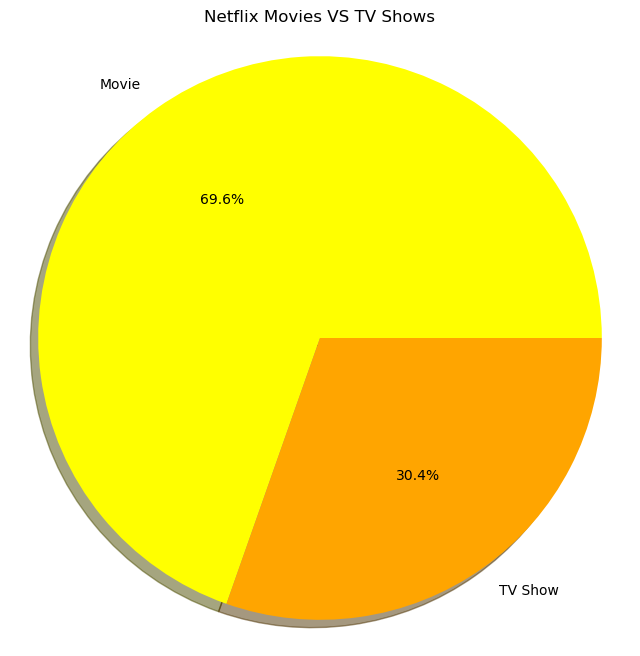

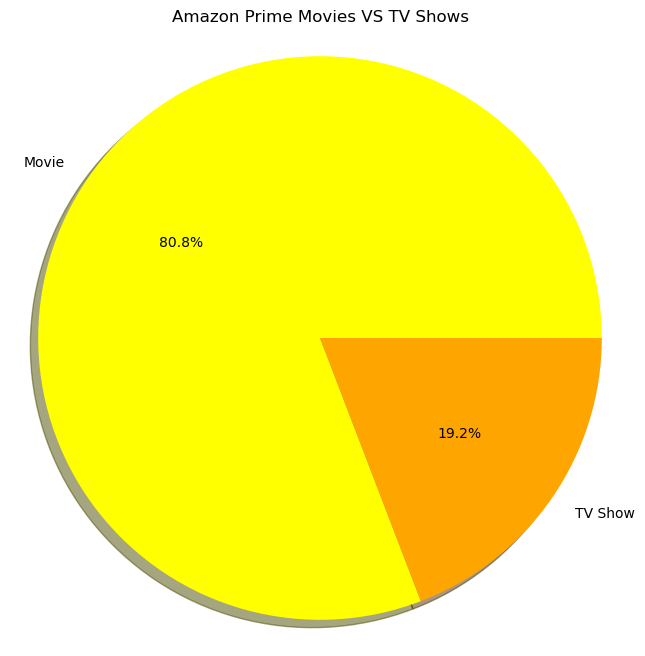

In [56]:
#Pie Chart
def plot_pie_chart(dataframe, title):
    labels = dataframe['type'].unique()
    values = dataframe['type'].value_counts()
    colors = ['Yellow', 'Orange']
    plt.figure(figsize=(8, 8))
    plt.title(title)
    plt.pie(values, labels=labels, colors=colors, shadow=True, startangle=0, autopct="%1.1f%%")
    plt.axis('equal')
    plt.show()

# Plot pie chart for Netflix Data
plot_pie_chart(netflix_df, 'Netflix Movies VS TV Shows')

# Plot pie chart for Amazon Prime Data
plot_pie_chart(amazon_prime_df, 'Amazon Prime Movies VS TV Shows')


## Top 5 Countries

In [57]:
# Function to get top 5 countries
def get_top_5_countries(df):
    top_countries = dict(df['country'].value_counts())
    top5_countrynames = list(top_countries.keys())[:5]
    top5_countries = list(top_countries.values())[:5]
    return top5_countrynames, top5_countries

# Get top 5 countries for Netflix Data
netflix_top5_countrynames, netflix_top5_countries = get_top_5_countries(netflix_df)
print("\nNetflix Data - Top 5 Countries:")
print(netflix_top5_countrynames)
print(netflix_top5_countries)

# Get top 5 countries for Amazon Prime Data
amazon_prime_top5_countrynames, amazon_prime_top5_countries = get_top_5_countries(amazon_prime_df)
print("\nAmazon Prime Data - Top 5 Countries:")
print(amazon_prime_top5_countrynames)
print(amazon_prime_top5_countries)


Netflix Data - Top 5 Countries:
['United States', 'India', 'United Kingdom', 'Japan', 'South Korea']
[2818, 972, 419, 245, 199]

Amazon Prime Data - Top 5 Countries:
['United States', 'India', 'United Kingdom', 'Canada', 'United Kingdom, United States']
[253, 229, 28, 16, 12]


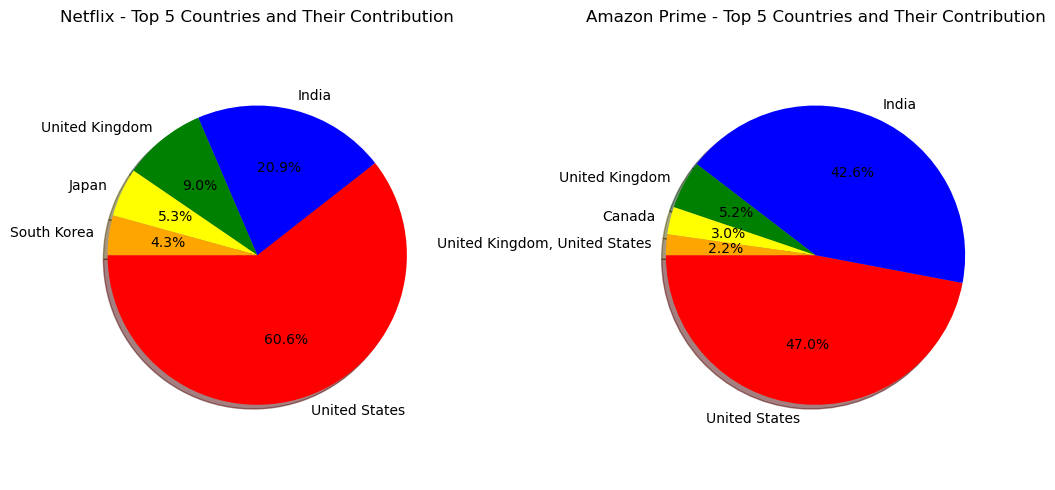

In [58]:
# Plotting Netflix Data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # subplot for Netflix
labels_netflix = netflix_top5_countrynames
values_netflix = netflix_top5_countries
colors = ['Red', 'Blue', 'Green', 'Yellow', 'Orange']
plt.title('Netflix - Top 5 Countries and Their Contribution')
plt.pie(values_netflix, labels=labels_netflix, colors=colors, shadow=True, startangle=180, autopct="%1.1f%%")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Plotting Amazon Prime Data
plt.subplot(1, 2, 2)  # subplot for Amazon Prime
labels_prime = amazon_prime_top5_countrynames
values_prime = amazon_prime_top5_countries
plt.title('Amazon Prime - Top 5 Countries and Their Contribution')
plt.pie(values_prime, labels=labels_prime, colors=colors, shadow=True, startangle=180, autopct="%1.1f%%")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the plot
plt.tight_layout()
plt.show()


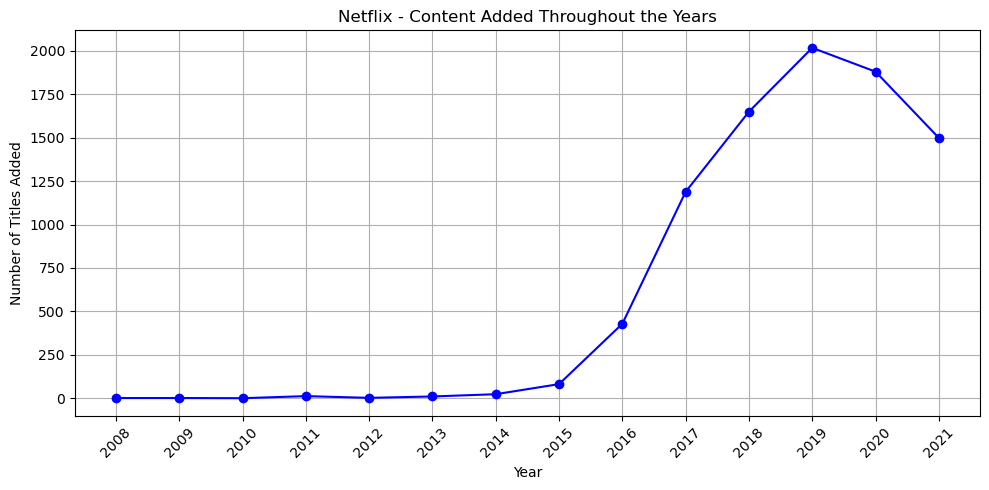

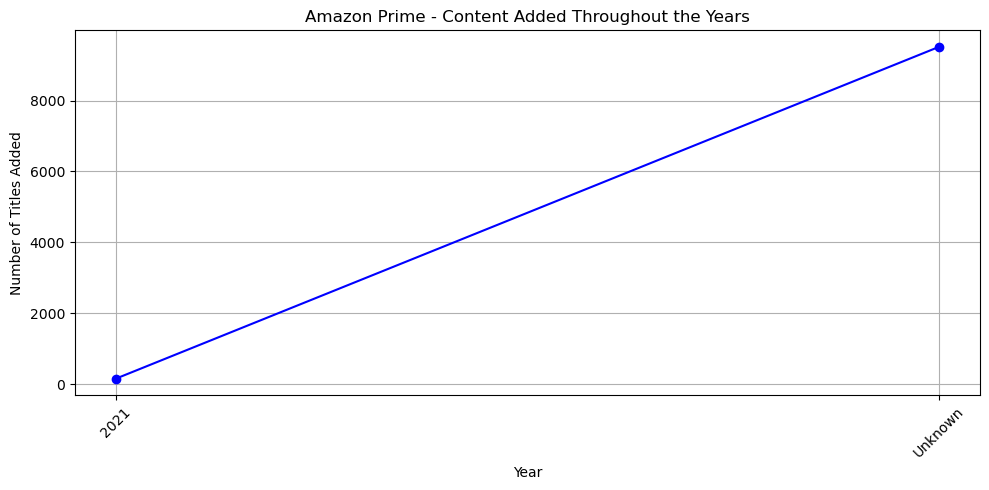

In [62]:
# Function to plot content added throughout the years
def plot_content_added_years(df, platform_name):
    years_count = df['year_added'].value_counts().sort_index()
    years = list(years_count.index)
    counts = list(years_count.values)
    
    plt.figure(figsize=(10, 5))
    plt.plot(years, counts, marker='o', linestyle='-', color='b')
    plt.title(f'{platform_name} - Content Added Throughout the Years')
    plt.xlabel('Year')
    plt.ylabel('Number of Titles Added')
    plt.grid(True)
    plt.xticks(years, rotation=45)
    plt.tight_layout()
    plt.show()

# Plotting Netflix Data
plot_content_added_years(netflix_df, 'Netflix')

# Plotting Amazon Prime Data
plot_content_added_years(amazon_prime_df, 'Amazon Prime')

### Ratings Bar Chart

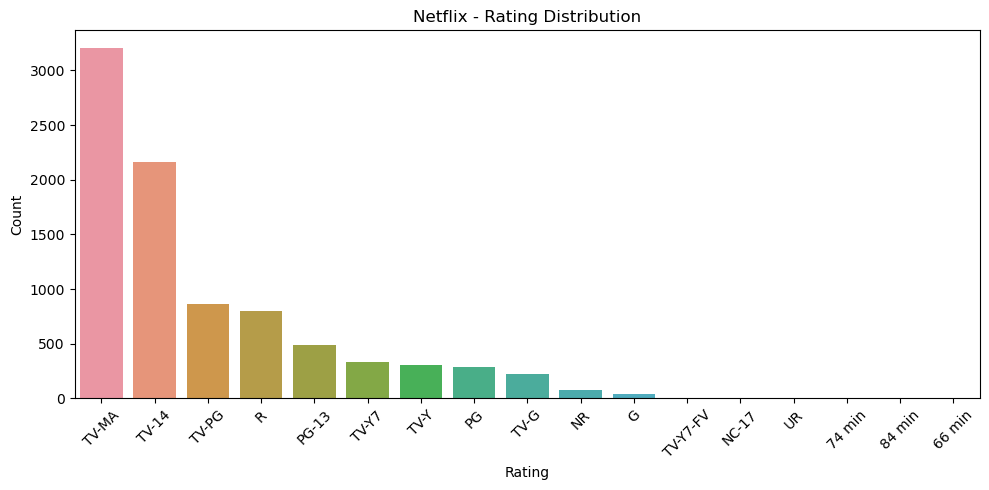

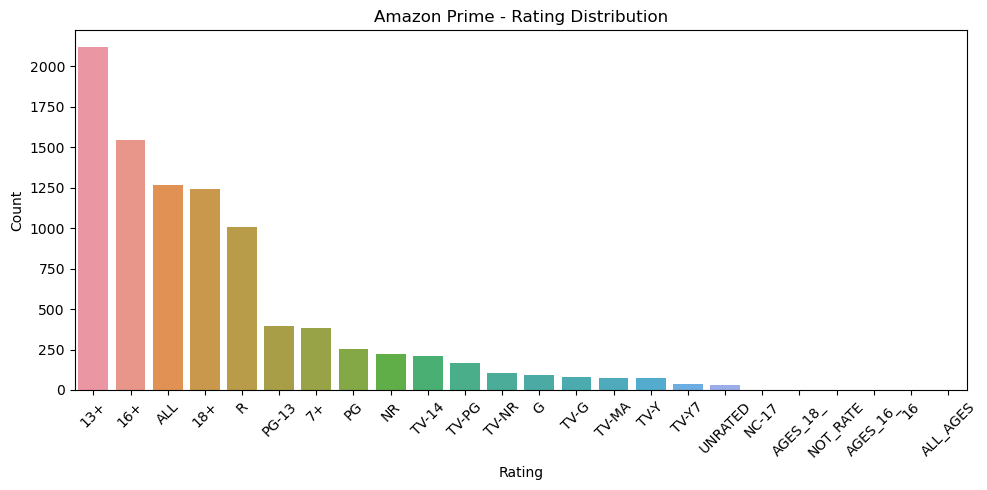

In [63]:
def plot_rating_distribution(df, platform_name):
    # Get unique ratings as strings
    labels = df['rating'].astype(str).unique()

    # Create a new DataFrame based on the counts of ratings
    rating_counts = df['rating'].value_counts().reset_index()
    rating_counts.columns = ['rating', 'count']
    sorted_df = rating_counts.sort_values(by='count', ascending=False)

    # Use Seaborn countplot for creating the bar chart
    plt.figure(figsize=(10, 5))
    sns.barplot(x='rating', y='count', data=sorted_df, order=sorted_df['rating'])
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.title(f'{platform_name} - Rating Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plotting Netflix Data
plot_rating_distribution(netflix_df, 'Netflix')

# Plotting Amazon Prime Data
plot_rating_distribution(amazon_prime_df, 'Amazon Prime')

### Top 5 Directors

In [64]:
def get_top_5_directors(df):
    top_directors = df['director'].value_counts().head(5)
    return top_directors

# Get top 5 directors for Netflix Data
netflix_top_directors = get_top_5_directors(netflix_df)
print("\nNetflix Data - Top Directors:")
netflix_names = list(netflix_top_directors.index)
netflix_values = list(netflix_top_directors.values)
print(netflix_names)
print(netflix_values)

# Get top 5 directors for Amazon Prime Data
amazon_prime_top_directors = get_top_5_directors(amazon_prime_df)
print("\nAmazon Prime Data - Top Directors:")
amazon_names = list(amazon_prime_top_directors.index)
amazon_values = list(amazon_prime_top_directors.values)
print(amazon_names)
print(amazon_values)


Netflix Data - Top Directors:
['Rajiv Chilaka', 'Raúl Campos, Jan Suter', 'Marcus Raboy', 'Suhas Kadav', 'Jay Karas']
[19, 18, 16, 16, 14]

Amazon Prime Data - Top Directors:
['Mark Knight', 'Cannis Holder', 'Moonbug Entertainment', 'Jay Chapman', 'Arthur van Merwijk']
[113, 61, 37, 34, 30]


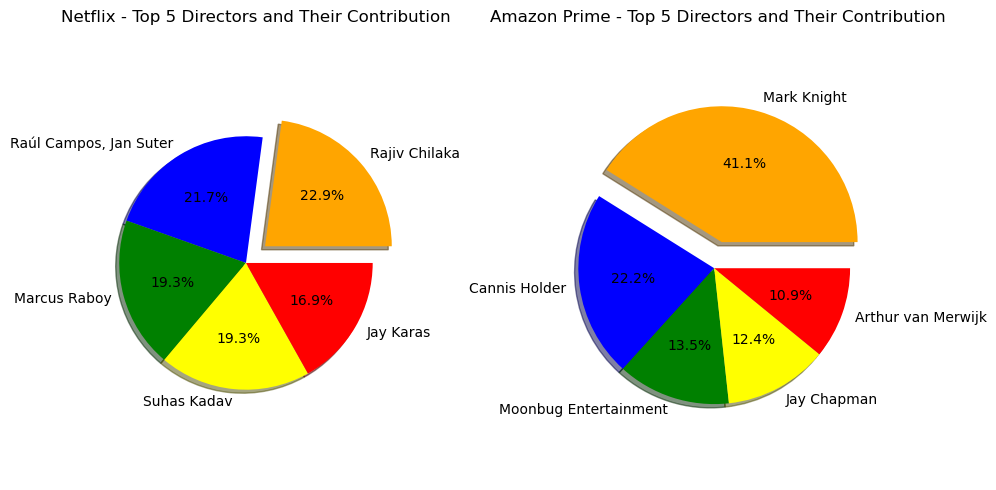

In [65]:
# Plotting Netflix Data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # subplot for Netflix
colors = ['Orange', 'Blue', 'Green', 'Yellow', 'Red']
plt.pie(netflix_values, labels=netflix_names, colors=colors, shadow=True, explode=[0.2, 0, 0, 0, 0], autopct="%1.1f%%")
plt.title('Netflix - Top 5 Directors and Their Contribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Plotting Amazon Prime Data
plt.subplot(1, 2, 2)  # subplot for Amazon Prime
plt.pie(amazon_values, labels=amazon_names, colors=colors, shadow=True, explode=[0.2, 0, 0, 0, 0], autopct="%1.1f%%")
plt.title('Amazon Prime - Top 5 Directors and Their Contribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the plot
plt.tight_layout()
plt.show()

### Release year with highest content

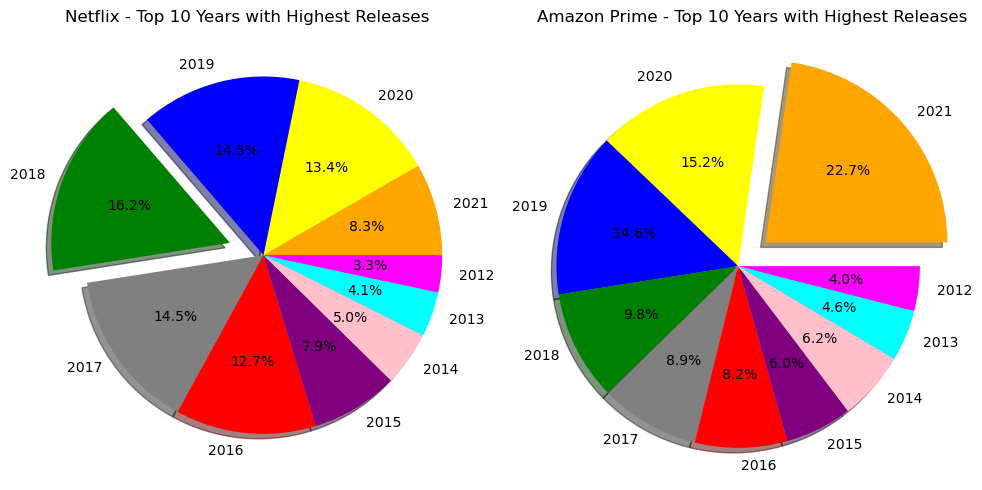

In [68]:
# Function to get top 10 years with highest releases
def get_top_10_years(df):
    years = list(df['release_year'].unique())
    years.sort()
    years.reverse()
    years = years[:10]
    values = df['release_year'].value_counts()
    values = values[years].sort_index(ascending=False)
    top_10_values = values[:10]
    return top_10_values

# Get top 10 years with highest releases for Netflix Data
netflix_top_10_years = get_top_10_years(netflix_df)
netflix_years = list(netflix_top_10_years.index)
netflix_values = list(netflix_top_10_years.values)
netflix_max_index = netflix_values.index(max(netflix_values))

# Get top 10 years with highest releases for Amazon Prime Data
amazon_prime_top_10_years = get_top_10_years(amazon_prime_df)
amazon_years = list(amazon_prime_top_10_years.index)
amazon_values = list(amazon_prime_top_10_years.values)
amazon_max_index = amazon_values.index(max(amazon_values))

# Plotting Netflix Data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # subplot for Netflix
colors = ['Orange', 'Yellow', 'Blue', 'Green', 'Grey', 'Red', 'Purple', 'Pink', 'Cyan', 'Magenta']
explode_netflix = [0.2 if i == netflix_max_index else 0 for i in range(len(netflix_values))]
plt.pie(netflix_values, labels=netflix_years, colors=colors, autopct="%1.1f%%", shadow=True, explode=explode_netflix)
plt.title('Netflix - Top 10 Years with Highest Releases')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Plotting Amazon Prime Data
plt.subplot(1, 2, 2)  # subplot for Amazon Prime
explode_amazon = [0.2 if i == amazon_max_index else 0 for i in range(len(amazon_values))]
plt.pie(amazon_values, labels=amazon_years, colors=colors, autopct="%1.1f%%", shadow=True, explode=explode_amazon)
plt.title('Amazon Prime - Top 10 Years with Highest Releases')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the plot
plt.tight_layout()
plt.show()
